In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [130]:
filename="Ames_Housing_Sales.csv"
file=os.path.join("IBM_DATA",filename)
data=pd.read_csv(file)

In [131]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [132]:
data.shape

(1379, 80)

In [133]:
data.dtypes

1stFlrSF        float64
2ndFlrSF        float64
3SsnPorch       float64
Alley            object
BedroomAbvGr      int64
                 ...   
WoodDeckSF      float64
YearBuilt         int64
YearRemodAdd      int64
YrSold            int64
SalePrice       float64
Length: 80, dtype: object

In [134]:
data_types=data.dtypes.value_counts()
data_types

object     43
float64    21
int64      16
dtype: int64

In [135]:
#SELECT THE OBJECT COLUMN

mask=data.dtypes=="object"
categorical_cols=data.columns[mask]
categorical_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [136]:
#DETERMINE HOW MANY EXTRA COLUMNS WOULD BE CREATED

num_ohc_col=(data[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=True))
num_ohc_col

Utilities         2
Street            2
CentralAir        2
PavedDrive        3
LandSlope         3
GarageFinish      3
Alley             3
PoolQC            4
ExterCond         4
ExterQual         4
MasVnrType        4
LotShape          4
BsmtCond          4
LandContour       4
KitchenQual       4
HeatingQC         5
BldgType          5
MiscFeature       5
MSZoning          5
LotConfig         5
BsmtQual          5
GarageQual        5
GarageCond        5
Fence             5
Electrical        5
BsmtExposure      5
GarageType        6
Heating           6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
Foundation        6
FireplaceQu       6
BsmtFinType2      7
Functional        7
Condition2        8
RoofMatl          8
HouseStyle        8
Condition1        9
SaleType          9
Exterior1st      14
Exterior2nd      16
Neighborhood     25
dtype: int64

In [137]:
#NO NEED TO ENCODE IF ONLY ONE VALUE PRESENT IN A COLUMN
gt_one_val_col=num_ohc_col.loc[num_ohc_col>1]
gt_one_val_col

Utilities         2
Street            2
CentralAir        2
PavedDrive        3
LandSlope         3
GarageFinish      3
Alley             3
PoolQC            4
ExterCond         4
ExterQual         4
MasVnrType        4
LotShape          4
BsmtCond          4
LandContour       4
KitchenQual       4
HeatingQC         5
BldgType          5
MiscFeature       5
MSZoning          5
LotConfig         5
BsmtQual          5
GarageQual        5
GarageCond        5
Fence             5
Electrical        5
BsmtExposure      5
GarageType        6
Heating           6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
Foundation        6
FireplaceQu       6
BsmtFinType2      7
Functional        7
Condition2        8
RoofMatl          8
HouseStyle        8
Condition1        9
SaleType          9
Exterior1st      14
Exterior2nd      16
Neighborhood     25
dtype: int64

In [138]:
lt_one_val_col=num_ohc_col.loc[num_ohc_col<1]
lt_one_val_col

Series([], dtype: int64)

In [139]:
#NUMBER OF ONE HOT COLUMNS IS ONE LESS THAN THE NUMBER OF CATEGORIES

gt_one_val_col-=1
gt_one_val_col

Utilities         1
Street            1
CentralAir        1
PavedDrive        2
LandSlope         2
GarageFinish      2
Alley             2
PoolQC            3
ExterCond         3
ExterQual         3
MasVnrType        3
LotShape          3
BsmtCond          3
LandContour       3
KitchenQual       3
HeatingQC         4
BldgType          4
MiscFeature       4
MSZoning          4
LotConfig         4
BsmtQual          4
GarageQual        4
GarageCond        4
Fence             4
Electrical        4
BsmtExposure      4
GarageType        5
Heating           5
BsmtFinType1      5
SaleCondition     5
RoofStyle         5
Foundation        5
FireplaceQu       5
BsmtFinType2      6
Functional        6
Condition2        7
RoofMatl          7
HouseStyle        7
Condition1        8
SaleType          8
Exterior1st      13
Exterior2nd      15
Neighborhood     24
dtype: int64

In [140]:
gt_one_val_col.sum()

215

In [141]:
data_ohc=data.copy()
data_ohc.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [142]:
from sklearn.preprocessing import OneHotEncoder
ohc=OneHotEncoder()
for col in num_ohc_col.index:
    new_data=ohc.fit_transform(data_ohc[[col]])
    data_ohc=data_ohc.drop(col,axis=1)
    cats=ohc.categories_
    new_cols=['_'.join([col,cat]) for cat in cats[0]]
    new_df=pd.DataFrame(new_data.toarray(),columns=new_cols)
    data_ohc=pd.concat([data_ohc,new_df],axis=1)

In [143]:
data_ohc

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
#COLUMN DIFFERENCE IS AS CALCULATED ABOVE

data_ohc.shape[1]-data.shape[1]

215

In [145]:
#REMOVE STRING COLUMNS FROM DATAFRAME
data=data.drop(num_ohc_col.index,axis=1)
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


# TRAIN TEST SPLIT

In [154]:
y_col="SalePrice"

#SPLIT THE DATA THAT IS NOT ONE_HOT_ENCODED
feature_cols=[x for x in data.columns if x!=y_col]
X_data=data[feature_cols]
X_data
y_data=data[y_col]

In [156]:
X_data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [157]:
y_data

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1374    175000.0
1375    210000.0
1376    266500.0
1377    142125.0
1378    147500.0
Name: SalePrice, Length: 1379, dtype: float64

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3,random_state=42)

In [161]:
X_train.shape

(965, 36)

In [162]:
y_train.shape

(965,)

In [169]:
#SPLIT THE DATA THAT IS ONE_HOT_ENCODED
feature_cols=[x for x in data_ohc.columns if x!=y_col]
X_data_ohc=data_ohc[feature_cols]
y_data_ohc=data_ohc[y_col]
X_train_ohc,X_test_ohc,y_train_ohc,y_test_ohc=train_test_split(X_data_ohc,y_data_ohc,test_size=0.3,random_state=42)

In [171]:
#COMPARE THE INDECES
(X_train.index==X_train_ohc.index).all()

True

# LINEAR REGRESSION

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR=LinearRegression()

#storage for error values
error_df=list()

#FIT MODEL WITHOUT OneHotEncoding Data
LR=LR.fit(X_train,y_train)
y_train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)

error_df.append(pd.Series({
    'train_set':mean_squared_error(y_train,y_train_pred),
    'test_set':mean_squared_error(y_test,y_test_pred)},
    name="no encoding"))

print(error_df)

[train_set    1.131507e+09
test_set     1.372182e+09
Name: no encoding, dtype: float64]


In [191]:
#FIT MODEL of OneHotEncoding Data
LR=LR.fit(X_train_ohc,y_train_ohc)
y_train_pred_ohc=LR.predict(X_train_ohc)
y_test_pred_ohc=LR.predict(X_test_ohc)

error_df.append(pd.Series({
    'train_set':mean_squared_error(y_train_ohc,y_train_pred_ohc),
    'test_set':mean_squared_error(y_test_ohc,y_test_pred_ohc)},
    name="one hot encoding"))

print(error_df)

[train_set    1.131507e+09
test_set     1.372182e+09
Name: no encoding, dtype: float64, train_set    3.177267e+08
test_set     2.030950e+13
Name: one hot encoding, dtype: float64]


In [194]:
#RESULTS
pd.concat(error_df,axis=1)

,no encoding,one hot encoding
train_set,1.131507e+09,3.177267e+08
test_set,1.372182e+09,2.030950e+13


# Scale using ScanadardScalar or MinMaxScalar

<h5>BE SURE TO FIT THE SCALAR ONLY ON THE TRAINING DATA THEN APPLY IT TO BOTH THE TRAIN AND TEST DATA IDENTICALLY</h5>

In [206]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scalars={
    'standard':StandardScaler(),
    'minmax':MinMaxScaler()
}

LR=LinearRegression()

#for errors
errors={}

for scalar_label, scalar in scalars.items():
    trainingset=scalar.fit_transform(X_train)
    testset=scalar.transform(X_test)
    LR.fit(trainingset,y_train)
    prediction=LR.predict(testset)
    key=scalar_label+' scaling'
    errors[key]=mean_squared_error(y_test,prediction)

errors=pd.Series(errors)

for key,error_val in errors.items():
    print(key,error_val)

standard scaling 1372182358.9345078
minmax scaling 1372182358.9345083


# PLOT PREDICTIONS VS ACTUAL VALUES

[Text(0.5, 0, 'Predictor'),
 Text(0, 0.5, 'Target'),
 Text(0.5, 1.0, 'Ames, Iowa House Price Predicitions vs Truth using Linear Regression')]

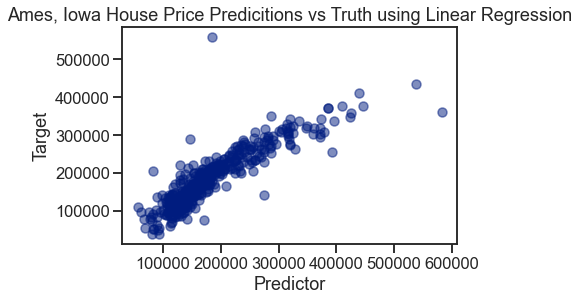

In [210]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax=plt.axes()
ax.scatter(y_test,y_test_pred,alpha=0.5)

ax.set(xlabel="Predictor",
       ylabel="Target",
       title="Ames, Iowa House Price Predicitions vs Truth using Linear Regression"
      )